# Look at the data.

In [269]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

file_path = "C:/Users/zolta/PycharmProjects/Duke/CCPP_data.csv"
df = pd.read_csv(file_path)

#print(df.head(10))

#print(df.shape)

print(df.isna)

<bound method DataFrame.isna of       Temperature (AT)  Exhaust Vacuum(V)  Ambient Pressure (AP)  \
0                 1.81              39.42                1026.92   
1                 2.34              39.42                1028.47   
2                 2.58              39.42                1028.68   
3                 2.64              39.64                1011.02   
4                 2.71              39.42                1026.66   
...                ...                ...                    ...   
9563             35.10              68.27                1006.96   
9564             35.20              73.56                1006.56   
9565             35.56              68.94                1006.56   
9566             35.77              73.56                1006.36   
9567             37.11              68.94                1006.23   

      Relative Humidity (RH)  Energy Output (PE)  
0                      76.97              490.55  
1                      69.68              490.34 

We have a table with 5 columns and 9568 rows. No data is missing.

In [270]:
df.head()

,Temperature (AT),Exhaust Vacuum(V),Ambient Pressure (AP),Relative Humidity (RH),Energy Output (PE)
0,1.81,39.42,1026.92,76.97,490.55
1,2.34,39.42,1028.47,69.68,490.34
2,2.58,39.42,1028.68,69.03,488.69
3,2.64,39.64,1011.02,85.24,481.29
4,2.71,39.42,1026.66,81.11,489.30


In [271]:
df.tail()

,Temperature (AT),Exhaust Vacuum(V),Ambient Pressure (AP),Relative Humidity (RH),Energy Output (PE)
9563,35.10,68.27,1006.96,43.51,426.30
9564,35.20,73.56,1006.56,45.72,434.37
9565,35.56,68.94,1006.56,38.75,429.69
9566,35.77,73.56,1006.36,36.31,430.14
9567,37.11,68.94,1006.23,31.15,429.25


In [272]:
import matplotlib.pyplot as plt

In [273]:
df.describe()

,Temperature (AT),Exhaust Vacuum(V),Ambient Pressure (AP),Relative Humidity (RH),Energy Output (PE)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [274]:
df.columns=['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity','EnergyOutput']

In [275]:
df.describe()

,Temperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,EnergyOutput
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


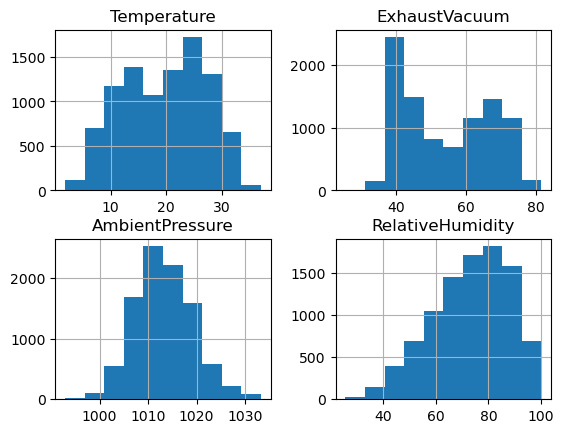

In [278]:
viz = df[['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity']]
viz.hist()
plt.show()

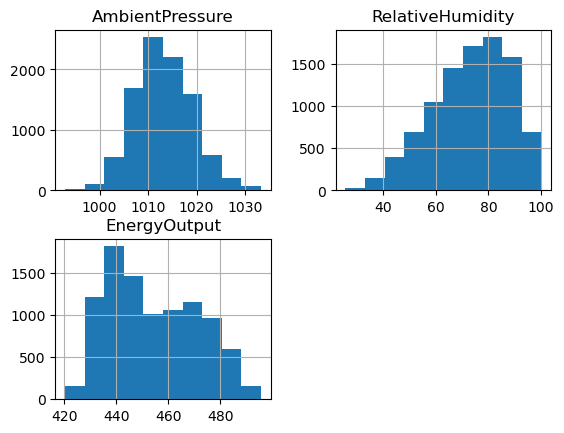

In [277]:
viz = df[['AmbientPressure','RelativeHumidity','EnergyOutput']]
viz.hist()
plt.show()

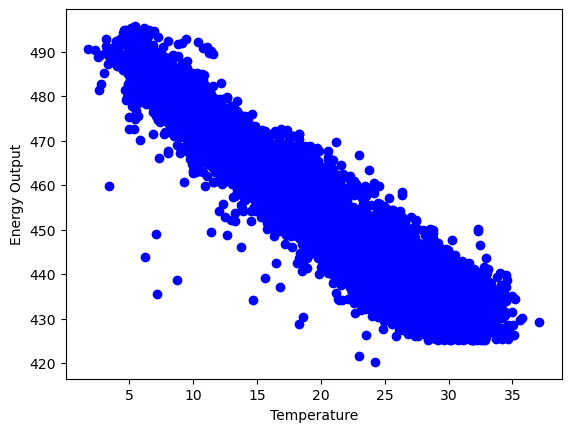

In [12]:
plt.scatter(df.Temperature, df.EnergyOutput,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Energy Output")
plt.show()

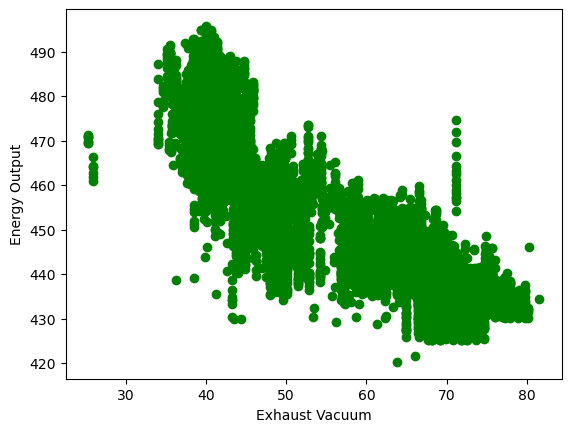

In [13]:
plt.scatter(df.ExhaustVacuum, df.EnergyOutput,  color='green')
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Energy Output")
plt.show()

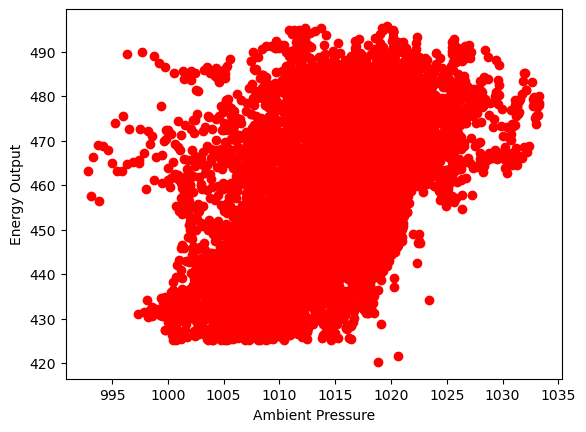

In [14]:
plt.scatter(df.AmbientPressure, df.EnergyOutput,  color='red')
plt.xlabel("Ambient Pressure")
plt.ylabel("Energy Output")
plt.show()

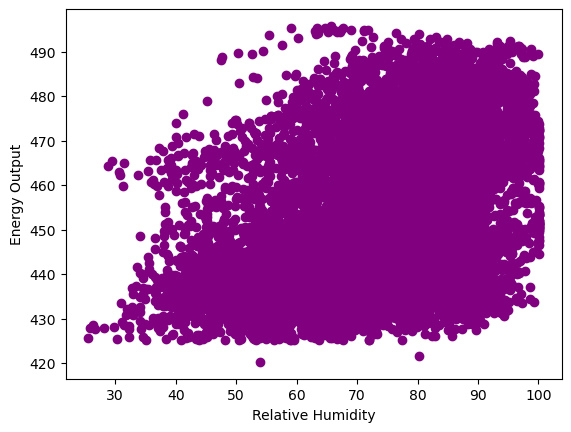

In [16]:
plt.scatter(df.RelativeHumidity, df.EnergyOutput,  color='purple')
plt.xlabel("Relative Humidity")
plt.ylabel("Energy Output")
plt.show()

# Create Train and Test datasets

In [110]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk] 

In [111]:
train.columns=['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity','EnergyOutput']
test.columns=['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity','EnergyOutput']

In [112]:
train.shape

(7617, 5)

In [113]:
test.shape

(1951, 5)

# Train the model with Temperature

In [114]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature']])
train_y = np.asanyarray(train[['EnergyOutput']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.17120057]]
Intercept:  [497.03209878]


Text(0, 0.5, 'Energy Output')

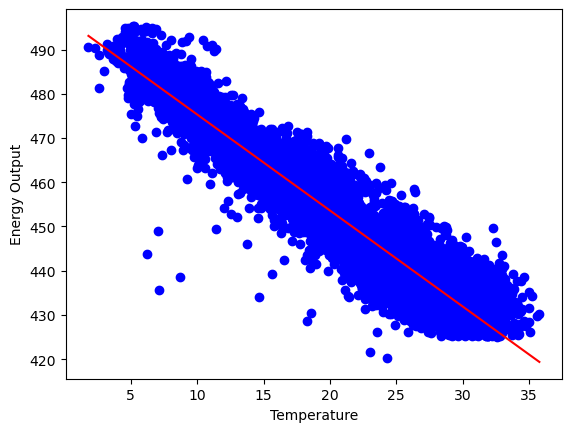

In [115]:
plt.scatter(train.Temperature, train.EnergyOutput,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Temperature")
plt.ylabel("Energy Output")

In [116]:
test_x = np.asanyarray(test[['Temperature']])
test_y = np.asanyarray(test[['EnergyOutput']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4.36
Residual sum of squares (MSE): 29.33
R2-score: 0.90


# Train the model with Exhaust Vaccum

In [235]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ExhaustVacuum']])
train_y = np.asanyarray(train[['EnergyOutput']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.16813638]]
Intercept:  [517.77240963]


Text(0, 0.5, 'Energy Output')

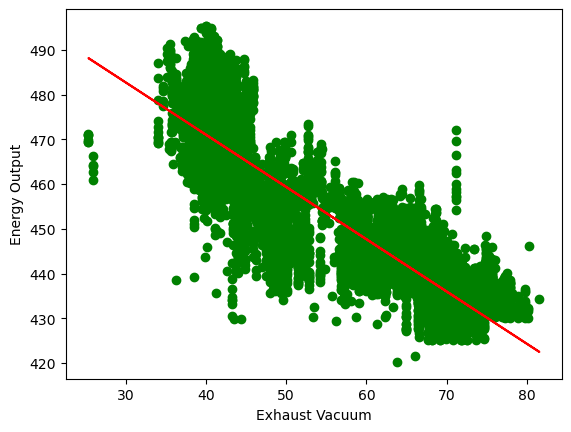

In [236]:
plt.scatter(train.ExhaustVacuum, train.EnergyOutput,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Energy Output")

In [237]:
test_x = np.asanyarray(test[['ExhaustVacuum']])
test_y = np.asanyarray(test[['EnergyOutput']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 6.60
Residual sum of squares (MSE): 71.32
R2-score: 0.76


# Train the model with Ambient Pressure

In [283]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AmbientPressure']])
train_y = np.asanyarray(train[['EnergyOutput']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.48593216]]
Intercept:  [-1051.33852217]


Text(0, 0.5, 'Energy Output')

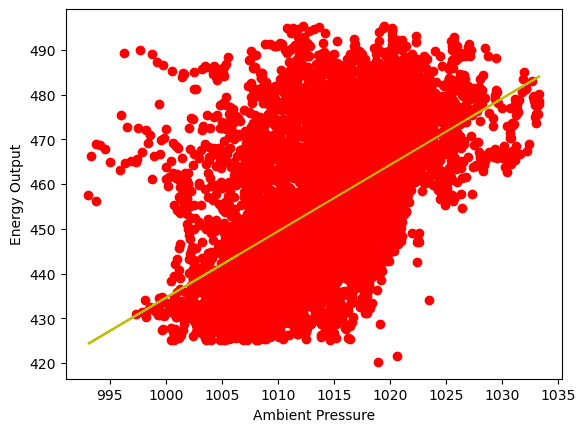

In [284]:
plt.scatter(train.AmbientPressure, train.EnergyOutput,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-y')
plt.xlabel("Ambient Pressure")
plt.ylabel("Energy Output")

In [285]:
test_x = np.asanyarray(test[['Temperature']])
test_y = np.asanyarray(test[['EnergyOutput']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 1476.58
Residual sum of squares (MSE): 2181069.45
R2-score: -7416.19


# Train the model with Relative Humidity

In [279]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['RelativeHumidity']])
train_y = np.asanyarray(train[['EnergyOutput']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.45492077]]
Intercept:  [421.00809293]


Text(0, 0.5, 'Energy Output')

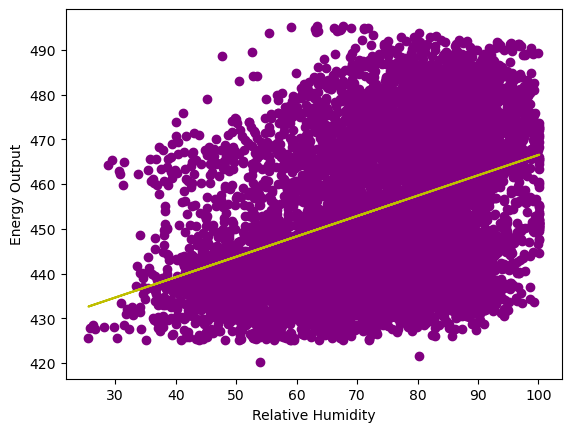

In [280]:
plt.scatter(train.RelativeHumidity, train.EnergyOutput,  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-y')
plt.xlabel("Relative Humidity")
plt.ylabel("Energy Output")

In [282]:
test_x = np.asanyarray(test[['Temperature']])
test_y = np.asanyarray(test[['EnergyOutput']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.32
Residual sum of squares (MSE): 1015.46
R2-score: -2.45


# Multipe Linear Regression

## Using three features

In [130]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ExhaustVacuum','AmbientPressure','RelativeHumidity']])
y = np.asanyarray(train[['EnergyOutput']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.00337375  0.55843529  0.15948685]]


In [131]:
y_hat= regr.predict(test[['ExhaustVacuum','AmbientPressure','RelativeHumidity']])
x = np.asanyarray(test[['ExhaustVacuum','AmbientPressure','RelativeHumidity']])
y = np.asanyarray(test[['EnergyOutput']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 56.03
Variance score: 0.81


C:\Users\zolta\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Using two features

In [301]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Temperature','ExhaustVacuum']])
y = np.asanyarray(train[['EnergyOutput']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.70344874 -0.3250516 ]]


In [302]:
y_hat= regr.predict(test[['Temperature','ExhaustVacuum']])
x = np.asanyarray(test[['Temperature','ExhaustVacuum']])
y = np.asanyarray(test[['EnergyOutput']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 24.48
Variance score: 0.92


C:\Users\zolta\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Using all 4 features

In [136]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity']])
y = np.asanyarray(train[['EnergyOutput']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.98019665 -0.23473875  0.05575819 -0.15852686]]


In [137]:
y_hat= regr.predict(test[['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity']])
x = np.asanyarray(test[['Temperature','ExhaustVacuum','AmbientPressure','RelativeHumidity']])
y = np.asanyarray(test[['EnergyOutput']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 20.64
Variance score: 0.93


C:\Users\zolta\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Polynomial Regression for Exhaust Vacuum (3rd order)

In [288]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(25, 85, 200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Energy Output ~ Exhaust Vacuum')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Energy Output')

    plt.show()
    plt.close()

In [289]:
x = train['ExhaustVacuum']
y = train['EnergyOutput']

In [290]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3           2
0.0001925 x - 0.01273 x - 1.585 x + 544


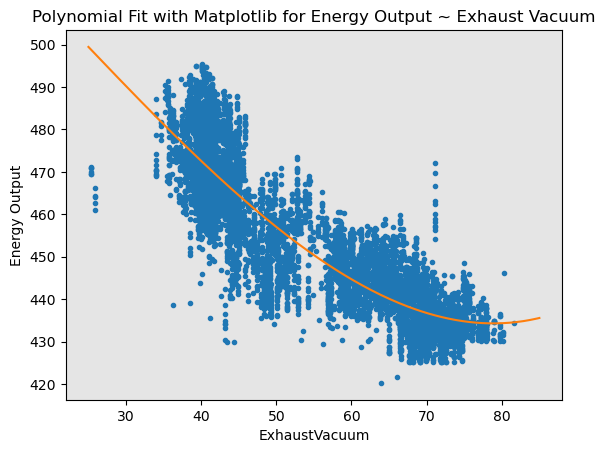

In [291]:
PlotPolly(p, x, y, 'ExhaustVacuum')

In [211]:
np.polyfit(x, y, 3)

array([ 1.92489777e-04, -1.27313550e-02, -1.58450452e+00,  5.44021810e+02])

## Polynomial Regression for Exhaust Vacuum (4rd order) -> Overfit

In [299]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

            4           3          2
-5.059e-05 x + 0.01126 x - 0.8992 x + 29.17 x + 154


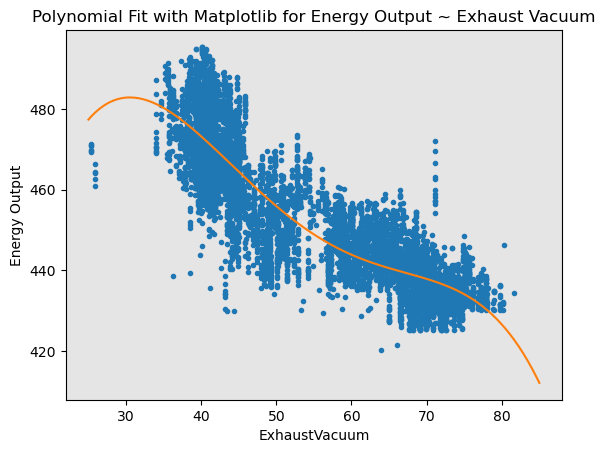

In [300]:
PlotPolly(p, x, y, 'ExhaustVacuum')